In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("resultats_api.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'trip_completed_at', 'trip_status', 'ride_hailing_app',
       'trip_uid', 'driver_uid', 'rider_uid', 'customer', 'trip_start_time',
       'trip_end_time', 'trip_time', 'total_time', 'wait_time', 'trip_type',
       'surge_multiplier', 'vehicle_make_model', 'vehicle_license_plate',
       'driver_name_en', 'vehicle_make', 'vehicle_model', 'driver_gender',
       'driver_photo_url', 'driver_phone_number', 'pickup_lat', 'pickup_long',
       'dropoff_lat', 'dropoff_long', 'trip_map_image_url',
       'trip_path_image_url', 'city', 'country', 'trip_start_address',
       'trip_end_address', 'rub_usd_exchange_rate', 'price_rub', 'price_usd',
       'distance_kms', 'temperature_time', 'temperature_value', 'feels_like',
       'humidity', 'wind_speed', 'cloudness', 'weather_main', 'weather_desc',
       'precipitation', 'place_type', 'place_name'],
      dtype='object')

In [4]:
data=data[['trip_uid','trip_start_time','trip_end_time','pickup_lat','pickup_long','dropoff_lat','dropoff_long','place_type']]
data.head()

,trip_uid,trip_start_time,trip_end_time,pickup_lat,pickup_long,dropoff_lat,dropoff_long,place_type
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:26:00,2015-05-11 17:55:00,60.031438,30.329826,59.963131,30.307655,route restaurant food point_of_interest estab...
1,518be51d403944a03c47e8d1f2c87311,2015-05-11 18:46:00,2015-05-11 19:12:00,59.963014,30.307313,60.031351,30.329495,locality political point_of_interest establis...
2,6e460cc8a12c3c6568d0d4a67ac58393,2015-05-13 09:15:00,2015-05-13 10:38:00,60.031529,30.329416,59.924281,30.387561,route point_of_interest store establishment r...
3,49613a86a04e6c15d72b51d1a2935d81,2015-05-16 00:24:00,2015-05-16 00:44:00,59.959883,30.311159,59.934680,30.308489,route lodging point_of_interest establishment...
4,9896148fdecdb4c5d977a8691510bdb6,2015-05-16 01:29:00,2015-05-16 02:18:00,59.934813,30.308553,60.031470,30.329402,route pet_store point_of_interest store estab...


## Classement de l'intérêt des places

### Créer une table

In [5]:
#récupérer la liste des types de places
data['place_type']=data['place_type'].str.split()
data.head()

,trip_uid,trip_start_time,trip_end_time,pickup_lat,pickup_long,dropoff_lat,dropoff_long,place_type
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:26:00,2015-05-11 17:55:00,60.031438,30.329826,59.963131,30.307655,"[route, restaurant, food, point_of_interest, e..."
1,518be51d403944a03c47e8d1f2c87311,2015-05-11 18:46:00,2015-05-11 19:12:00,59.963014,30.307313,60.031351,30.329495,"[locality, political, point_of_interest, estab..."
2,6e460cc8a12c3c6568d0d4a67ac58393,2015-05-13 09:15:00,2015-05-13 10:38:00,60.031529,30.329416,59.924281,30.387561,"[route, point_of_interest, store, establishmen..."
3,49613a86a04e6c15d72b51d1a2935d81,2015-05-16 00:24:00,2015-05-16 00:44:00,59.959883,30.311159,59.934680,30.308489,"[route, lodging, point_of_interest, establishm..."
4,9896148fdecdb4c5d977a8691510bdb6,2015-05-16 01:29:00,2015-05-16 02:18:00,59.934813,30.308553,60.031470,30.329402,"[route, pet_store, point_of_interest, store, e..."


In [6]:
placedata=data.explode('place_type')
placedata=placedata[['trip_uid','trip_end_time','dropoff_lat','dropoff_long','place_type']]
placedata.head()

,trip_uid,trip_end_time,dropoff_lat,dropoff_long,place_type
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,route
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,restaurant
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,food
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,point_of_interest
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,establishment


__DONC__
Dans placedata, on a la liste des coordonnées récupérées pour chaque place.

### Rassembler par compte d'occurence

In [7]:
placeoccurences=placedata[['place_type','trip_uid']].groupby('place_type').count().sort_values('trip_uid')

In [8]:
placeoccurences.tail(20)

,trip_uid
place_type,
moving_company,190
doctor,200
sublocality_level_2,203
bank,207
dentist,211
sublocality,219
real_estate_agency,231
beauty_salon,258
atm,274


### Groupements par jours et plages horaires

In [9]:
import datetime
def get_datetime(date_time_str):
    date_time_str=date_time_str+".0"
    return datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
def get_moment(dateobject):
    if dateobject.hour>6 and dateobject.hour<12:
        return "Matin"
    elif dateobject.hour<19:
        return "Aprèm"
    elif dateobject.hour<23:
        return "Soir"
    return "Nuit"

In [10]:
data['trip_end_time']=data['trip_end_time'].apply(get_datetime)
placedata['trip_end_time']=placedata['trip_end_time'].apply(get_datetime)

In [11]:
placedata['TET_weekday']=placedata['trip_end_time'].apply(lambda x:x.weekday())
placedata['TET_moment']=placedata['trip_end_time'].apply(get_moment)
placedata.head()

,trip_uid,trip_end_time,dropoff_lat,dropoff_long,place_type,TET_weekday,TET_moment
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,route,0,Aprèm
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,restaurant,0,Aprèm
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,food,0,Aprèm
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,point_of_interest,0,Aprèm
0,ee89076fd9da9bddf5f096b0ca42f8d5,2015-05-11 17:55:00,59.963131,30.307655,establishment,0,Aprèm


In [12]:
EDT=placedata.groupby(['TET_weekday','TET_moment'])[['place_type']].agg(lambda x:list(x))
EDT

place_type
TET_weekday TET_moment                                                   
0           Aprèm       [route, restaurant, food, point_of_interest, e...
            Matin       [route, gas_station, point_of_interest, establ...
            Nuit        [route, transit_station, point_of_interest, es...
            Soir        [locality, political, point_of_interest, estab...
1           Aprèm       [route, museum, point_of_interest, establishme...
            Matin       [route, lodging, point_of_interest, establishm...
            Nuit        [route, transit_station, point_of_interest, es...
            Soir        [route, pet_store, point_of_interest, store, e...
2           Aprèm       [locality, political, clothing_store, point_of...
            Matin       [route, point_of_interest, store, establishmen...
            Nuit        [locality, political, lodging, point_of_intere...
            Soir        [locality, political, shopping_mall, point_of_...
3           Aprèm       [locality, political, clothing_store, point_of...
            Matin       [route, transit_station, point_of_interest, es...
            Soir        [route, dentist, health, point_of_interest, es...
4           Aprèm       [route, lodging, point_of_interest, establishm...
            Matin       [route, amusement_park, point_of_interest, est...
            Nuit        [locality, political, health, point_of_interes...
            Soir        [route, transit_station, point_of_interest, es...
5           Aprèm       [route, lodging, point_of_interest, establishm...
            Matin       [route, bus_station, transit_station, point_of...
            Soir        [route, lodging, point_of_interest, establishm...
6           Aprèm       [locality, political, food, point_of_interest,...
            Matin       [route, local_government_office, point_of_inte...
            Nuit        [route, point_of_interest, store, establishmen...
            Soir        [locality, political, atm, finance, point_of_i...

### Détection des éléments propres à un seul créneau

In [13]:
print(EDT.values.shape)

(26, 1)


In [14]:
elements_isoles=set()
for index,lst in enumerate(EDT.values):
    myset=set(lst[0])
    for jndex,lst2 in enumerate(EDT.values):
        if jndex==index:continue
        compareto=set(lst2[0])
        myset=myset.difference(compareto)
    print(index,myset)
    elements_isoles=elements_isoles.union( myset )

0 {'train_station'}
1 set()
2 set()
3 set()
4 {'veterinary_care'}
5 {'movie_rental'}
6 set()
7 set()
8 set()
9 set()
10 set()
11 set()
12 {'roofing_contractor'}
13 set()
14 {'zoo'}
15 set()
16 {'primary_school', 'amusement_park'}
17 set()
18 set()
19 {'post_office'}
20 set()
21 set()
22 set()
23 set()
24 set()
25 {'neighborhood'}


In [15]:
placeoccurences[placeoccurences.index.isin(elements_isoles)]

,trip_uid
place_type,
zoo,1
train_station,1
amusement_park,1
veterinary_care,1
roofing_contractor,1
primary_school,1
movie_rental,1
post_office,1
neighborhood,1


__CONCLUSION__

Pas pertinent... Ce ne sont absolument pas des habitudes, mais des voyages isolés ici.

### Classement à la main des lieux

In [16]:
placeoccurences.index

Index(['zoo', 'train_station', 'amusement_park', 'veterinary_care',
       'roofing_contractor', 'primary_school', 'movie_rental', 'post_office',
       'neighborhood', 'subway_station', 'funeral_home', 'meal_takeaway',
       'bowling_alley', 'electrician', 'convenience_store', 'gas_station',
       'hardware_store', 'police', 'secondary_school', 'place_of_worship',
       'embassy', 'parking', 'plumber', 'night_club', 'movie_theater',
       'meal_delivery', 'park', 'drugstore', 'bus_station', 'book_store',
       'premise', 'library', 'storage', 'local_government_office',
       'art_gallery', 'lawyer', 'museum', 'accounting', 'shopping_mall',
       'sublocality_level_1', 'car_dealer', 'insurance_agency', 'locksmith',
       'tourist_attraction', 'car_rental', 'liquor_store', 'bakery',
       'supermarket', 'university', 'laundry', 'gym', 'airport', 'spa',
       'jewelry_store', 'electronics_store', 'hospital', 'shoe_store',
       'grocery_or_supermarket', 'pharmacy', 'hair_care'

In [17]:
places_amusement=['zoo','amusement_park','movie_rental','bowling_alley','place_of_worship','night_club','movie_theater','park','library','art_gallery','museum','tourist_attraction','gym','spa','bar','cafe','travel_agency','restaurant','meal_takeway','food']
places_manger=['meal_takeaway','convenience_store','meal_delivery','drigstore','shopping_mall','liquor_store','bakery','supermarket','grocery_or_supermarket','bar','cafe','restaurant','food','store']
places_general=['neighborhood','premise','storage','sublocality_level_1','sublocality_level_2','sublocality','route','locality','point_of_interest','establishment']
places_sante=['veterinary_care','gym','spa','hospital','pharmacy','dentist','health']

Compte des différents types

In [18]:
for index,place in enumerate(placeoccurences.index):
    if place in places_amusement:
        print(place,':',placeoccurences['trip_uid'].values[index])

zoo : 1
amusement_park : 1
movie_rental : 1
bowling_alley : 2
place_of_worship : 3
night_club : 6
movie_theater : 6
park : 7
library : 7
art_gallery : 10
museum : 12
tourist_attraction : 17
gym : 28
spa : 31
bar : 52
cafe : 92
travel_agency : 97
restaurant : 152
food : 300


In [19]:
for index,place in enumerate(placeoccurences.index):
    if place in places_manger:
        print(place,':',placeoccurences['trip_uid'].values[index])

meal_takeaway : 2
convenience_store : 2
meal_delivery : 6
shopping_mall : 14
liquor_store : 20
bakery : 20
supermarket : 22
grocery_or_supermarket : 42
bar : 52
cafe : 92
restaurant : 152
food : 300
store : 1471


In [20]:
for index,place in enumerate(placeoccurences.index):
    if place in places_general:
        print(place,':',placeoccurences['trip_uid'].values[index])

neighborhood : 1
premise : 7
storage : 8
sublocality_level_1 : 16
sublocality_level_2 : 203
sublocality : 219
route : 445
locality : 660
point_of_interest : 7611
establishment : 7611


In [21]:
for index,place in enumerate(placeoccurences.index):
    if place in places_sante:
        print(place,':',placeoccurences['trip_uid'].values[index])

veterinary_care : 1
gym : 28
spa : 31
hospital : 39
pharmacy : 42
dentist : 211
health : 838


### Critère d'entropie minimale

J'ai 4$\times$7 plages temporelles. On compte le nombre d'occurences d'un mot clé par plage temporelle, et trouve la distribution. On utilise alors l'entropie.

Pourquoi l'entropie ?
 - Une entropie faible veut dire que peu de créneaux sont représentés.
 - Une entropie forte veut dire que les créneaux sont tous représentés similairement.

Ont peut donc observer les évènements qui dépendent du moment.

In [22]:
import scipy.stats
grb=placedata.groupby(['place_type','TET_weekday','TET_moment']).count()[['trip_uid']]
tabres=[]
for motcle in placeoccurences.index:
    tabres.append(scipy.stats.entropy(grb.loc[motcle])[0])
placeoccurences["EDT_entropy"]=pd.Series(tabres,index=placeoccurences.index)
placeoccurences.head(10)

,trip_uid,EDT_entropy
place_type,,
zoo,1,0.000000
train_station,1,0.000000
amusement_park,1,0.000000
veterinary_care,1,0.000000
roofing_contractor,1,0.000000
primary_school,1,0.000000
movie_rental,1,0.000000
post_office,1,0.000000
neighborhood,1,0.000000


<IPython.core.display.Javascript object>


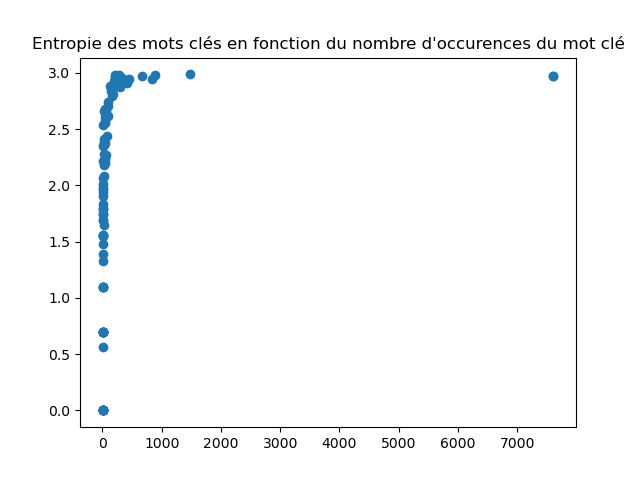

Text(0.5, 1.0, "Entropie des mots clés en fonction du nombre d'occurences du mot clé")

In [23]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.scatter(placeoccurences['trip_uid'],placeoccurences['EDT_entropy'])
plt.title("Entropie des mots clés en fonction du nombre d'occurences du mot clé")

L'entropie n'est pas immédiatement utilisable. On observe que s'il y a peu d'occurences d'un mot clé, l'entropie associée sera faible, et montera rapidement pour atteindre un palier. Au lieu de regarder l'entropie faible, il vaut mieux regarder les points qui sont en dessous de la tendance, compte tenu le nombre d'occurences du mot clé.

Pour estimer quels points se démarquent, on peut estimer cette courbe et regarder les points qui sont bien en dessous de leur estimation.

En premier, j'enlève point_of_interest et establishment qui faussent le modèle.

In [24]:
w=placeoccurences[placeoccurences!='point_of_interest'][placeoccurences!='establishment']

<IPython.core.display.Javascript object>


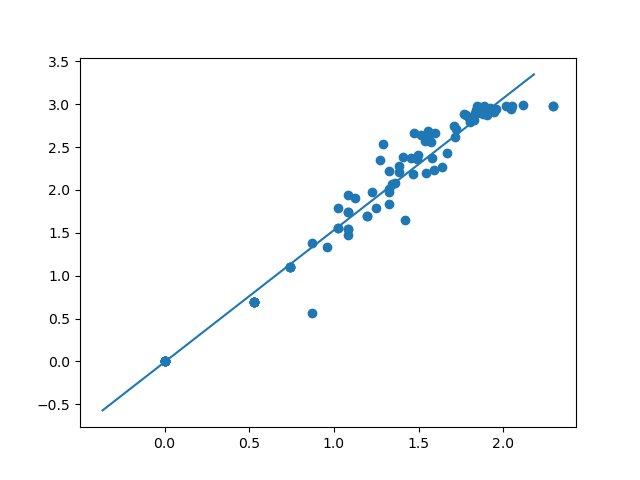

0.9573033757395326

In [25]:
from sklearn.linear_model import LinearRegression
X=np.reshape(w['trip_uid'].values,(-1,1))
y=w['EDT_entropy']
X=np.log(X)
X=np.log(X+1)
plt.scatter(X,y)
model=LinearRegression().fit(X,y)
x=np.arange(2,7000,1)
plt.plot(np.log(np.log(x)),model.predict(np.reshape(np.log(np.log(x)),(-1,1))))
model.score(X,y)

In [26]:
placeoccurences['diff_expected_entropy']=y-model.predict(np.reshape(np.log(np.log(placeoccurences['trip_uid'].values)+1),(-1,1)))
placeoccurences.sort_values('diff_expected_entropy').head(15)

,trip_uid,EDT_entropy,diff_expected_entropy
place_type,,,
embassy,4,0.562335,-0.768292
point_of_interest,7611,2.975558,-0.550724
establishment,7611,2.975558,-0.550724
university,23,1.647214,-0.529725
store,1471,2.987278,-0.260723
car_wash,63,2.270441,-0.242114
furniture_store,50,2.236396,-0.205395
locksmith,16,1.836422,-0.199155
health,838,2.946952,-0.192917


In [27]:
grb.loc["shoe_store"]

trip_uid
TET_weekday TET_moment          
0           Aprèm              2
            Soir               1
1           Aprèm              1
            Matin              1
            Soir               1
2           Aprèm              1
            Matin              1
            Soir               1
3           Aprèm             16
            Matin              2
            Soir               2
4           Aprèm              1
            Matin              1
            Soir               4
5           Aprèm              1
6           Matin              4

In [28]:
grb.loc["furniture_store"]

trip_uid
TET_weekday TET_moment          
0           Aprèm              2
            Matin              2
            Soir               2
1           Aprèm              3
            Matin              2
            Soir               1
2           Aprèm              5
            Matin              1
4           Aprèm              3
            Matin              2
            Soir               1
5           Aprèm              3
6           Aprèm             17
            Soir               6